# Multiple Linear Regression 

In this notebook  multiple linear regression is implemented usng Scikitlearn.Dataset related to consumption of fuel and emission of carbon dioxide in cars is used.

Data is splitted into training and test sets. Training dataset is used for training of model and testing dataset is used for evaluation of model. 

Finally model was used to predict some unknown value.

### Importing packages

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
import numpy as np
import csv
%matplotlib inline

### `FuelConsumption.csv`:
Dataset downloaded is a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)


- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [75]:
df = pd.read_csv("D:\COURSES\COURSERA\LINEAR REGRESSION\FuelConsumption.csv")

df.head() # show top five entries/


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some featurs we want to use for regression.

In [76]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


### Data Visualization

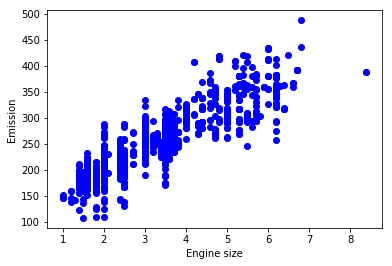

In [77]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

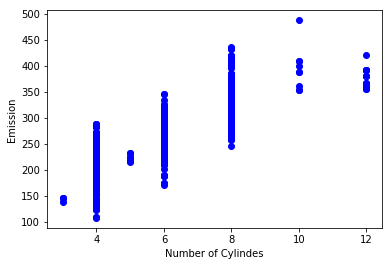

In [78]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of Cylindes")
plt.ylabel("Emission")
plt.show()

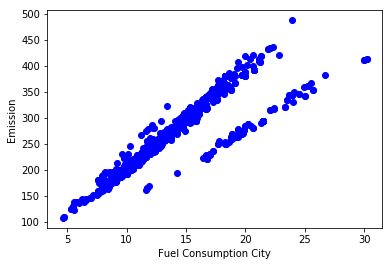

In [79]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption City")
plt.ylabel("Emission")
plt.show()

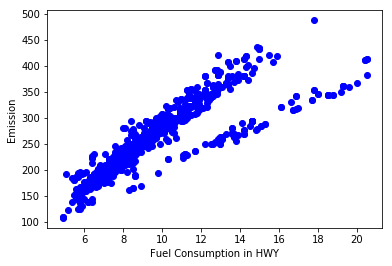

In [80]:
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption in HWY")
plt.ylabel("Emission")
plt.show()

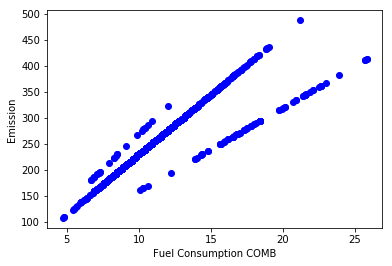

In [81]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption COMB")
plt.ylabel("Emission")
plt.show()

# Spliting Dataset into train and test

In [82]:
samples_count = np.random.rand(len(df)) < 0.8
train = cdf[samples_count]
test = cdf[~samples_count]

#### Training data distribution

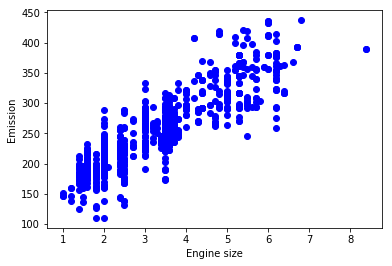

In [83]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Multipe Linear Regression Model 

In real sncerio emission of CO2 depends on several varibles rather than just one.For such cases where dependent varible relies on more than one independent variables multiple regression is employed.For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.Multiple linear regression is the extension of simple linear regression model.

## Outlining Model

In [84]:
from sklearn import linear_model 

regr_model=linear_model.LinearRegression()



## Training Model

In [85]:
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regr_model.fit(x,y)

print('Coefficients :', regr_model.coef_)
print('Intercept :', regr_model.intercept_)

Coefficients : [[10.50459262  7.60498104  9.56756755]]
Intercept : [65.87293065]


__Coefficients__ and __Intercept__ are the parameter to fit this line.Given that it a multiple linear regression problem, with 3 coefficients , and knowing that  parameters and intercept are the coefficients for this hyperplane, sklearn estimated these parameters.

Sklearn used Ordinary Least Squares method for solving this problem.

#### Ordinary Least Squares (OLS)

OLS is used to estimate unknown parameters in a linear regression model.OLS estimates these parameters by minimizing the  the sum of the squares of the differences between the target dependent variable and those predicted by the linear function.


OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

## Testing Model 1

In [86]:
y_hat= regr_model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))


print('Variance score: %.2f' % regr_model.score(x, y)) # Variance Score : 1 is perfect prediction in case of variance score

Residual sum of squares: 522.98
Variance score: 0.88


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

#### Model 2
##### Training Using ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY

In [87]:
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regr_model.fit(x,y)

print('Coefficients :', regr_model.coef_)
print('Intercept :', regr_model.intercept_)

Coefficients : [[10.54660286  7.30420128  6.06447611  3.24344135]]
Intercept : [66.89136533]


In [89]:
y_hat= regr_model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))


print('Variance score: %.2f' % regr_model.score(x, y)) # Variance Score : 1 is perfect prediction in case of variance score

# Using these values for training model resulted in higher Residual Sum of Squres

Residual sum of squares: 523.51
Variance score: 0.88
